<a href="https://colab.research.google.com/github/zhong338/pingzhong/blob/main/project_StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import sklearn
from sklearn.ensemble import (
    BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# create the DataFrame and stock information from Yahoo finance 
def create_lagged_series(symbol, start_date, end_date, lags=3):
    ts = web.DataReader( symbol, "yahoo", start_date, end_date)
    tslag = pd.DataFrame(index=ts.index)
    tslag["Today"] = ts["Adj Close"]
    tslag["Volume"] = ts["Volume"]

    for i in range(0,lags):
        tslag["Lag%s" % str(i+1)] = ts["Adj Close"].shift(i+1)

    tsret = pd.DataFrame(index=tslag.index)
    tsret["Volume"] = tslag["Volume"]
    tsret["Today"] = tslag["Today"].pct_change()*100.0

    for i in range(0,lags):
        tsret["Lag%s" % str(i+1)] = tslag[
            "Lag%s" % str(i+1)
        ].pct_change()*100.0
    tsret = tsret[tsret.index >= start_date]
    return tsret

In [ ]:
# set the random seed, number of estimators, and the 'step factor' used to plot the graph of MSE
random_state = 42
n_jobs = 1  
n_estimators = 1000
step_factor = 10
axis_step = int(n_estimators/step_factor)

In [ ]:
# Download ten years worth of apple 
# adjusted closing prices
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2019, 12, 31)
aapl = create_lagged_series("AAPL", start, end, lags=3)
aapl.dropna(inplace=True)

# Use the first three daily lags of AAPL closing prices
# and scale the data to lie within -1 and +1 for comparison
X = aapl[["Lag1", "Lag2", "Lag3"]]
y = aapl["Today"]
X = scale(X)
y = scale(y)

In [ ]:
aapl.head()

,Volume,Today,Lag1,Lag2,Lag3
Date,,,,,
2008-01-08,380954000.0,-3.597171,-1.338523,-7.633490,0.046160
2008-01-09,453470500.0,4.759117,-3.597171,-1.338523,-7.633490
2008-01-10,370743800.0,-0.769221,4.759117,-3.597171,-1.338523
2008-01-11,308071400.0,-2.994044,-0.769221,4.759117,-3.597171
2008-01-14,275112600.0,3.526557,-2.994044,-0.769221,4.759117


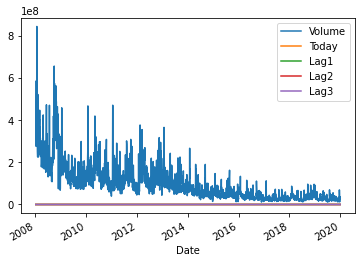

In [ ]:
data = aapl['2011-10-08':].copy()
aapl.plot()

In [ ]:
# Use the training-testing split with 70% of data in the
# training data with the remaining 30% of data in the testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=random_state)

In [ ]:
# Pre-create the arrays which will contain the MSE for
# each particular ensemble method
estimators = np.zeros(axis_step)
bagging_mse = np.zeros(axis_step)
rf_mse = np.zeros(axis_step)
boosting_mse = np.zeros(axis_step)

In [ ]:
# Estimate the Bagging MSE over the full number
# of estimators, across a step size ("step_factor")
for i in range(0, axis_step):
    print("Bagging Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    bagging = BaggingRegressor(
        DecisionTreeRegressor(), 
        n_estimators=step_factor*(i+1),
        n_jobs=n_jobs,
        random_state=random_state
    )
    bagging.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bagging.predict(X_test))
    estimators[i] = step_factor*(i+1)
    bagging_mse[i] = mse

Bagging Estimator: 10 of 1000...
Bagging Estimator: 20 of 1000...
Bagging Estimator: 30 of 1000...
Bagging Estimator: 40 of 1000...
Bagging Estimator: 50 of 1000...
Bagging Estimator: 60 of 1000...
Bagging Estimator: 70 of 1000...
Bagging Estimator: 80 of 1000...
Bagging Estimator: 90 of 1000...
Bagging Estimator: 100 of 1000...
Bagging Estimator: 110 of 1000...
Bagging Estimator: 120 of 1000...
Bagging Estimator: 130 of 1000...
Bagging Estimator: 140 of 1000...
Bagging Estimator: 150 of 1000...
Bagging Estimator: 160 of 1000...
Bagging Estimator: 170 of 1000...
Bagging Estimator: 180 of 1000...
Bagging Estimator: 190 of 1000...
Bagging Estimator: 200 of 1000...
Bagging Estimator: 210 of 1000...
Bagging Estimator: 220 of 1000...
Bagging Estimator: 230 of 1000...
Bagging Estimator: 240 of 1000...
Bagging Estimator: 250 of 1000...
Bagging Estimator: 260 of 1000...
Bagging Estimator: 270 of 1000...
Bagging Estimator: 280 of 1000...
Bagging Estimator: 290 of 1000...
Bagging Estimator: 300 

In [ ]:
# Estimate the Random Forest MSE over the full number
# of estimators, across a step size ("step_factor")
for i in range(0, axis_step):
    print("Random Forest Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    rf = RandomForestRegressor(
        n_estimators=step_factor*(i+1),
        n_jobs=n_jobs,
        random_state=random_state
    )
    rf.fit(X_train, y_train)
    mse = mean_squared_error(y_test, rf.predict(X_test))
    estimators[i] = step_factor*(i+1)
    rf_mse[i] = mse

Random Forest Estimator: 10 of 1000...
Random Forest Estimator: 20 of 1000...
Random Forest Estimator: 30 of 1000...
Random Forest Estimator: 40 of 1000...
Random Forest Estimator: 50 of 1000...
Random Forest Estimator: 60 of 1000...
Random Forest Estimator: 70 of 1000...
Random Forest Estimator: 80 of 1000...
Random Forest Estimator: 90 of 1000...
Random Forest Estimator: 100 of 1000...
Random Forest Estimator: 110 of 1000...
Random Forest Estimator: 120 of 1000...
Random Forest Estimator: 130 of 1000...
Random Forest Estimator: 140 of 1000...
Random Forest Estimator: 150 of 1000...
Random Forest Estimator: 160 of 1000...
Random Forest Estimator: 170 of 1000...
Random Forest Estimator: 180 of 1000...
Random Forest Estimator: 190 of 1000...
Random Forest Estimator: 200 of 1000...
Random Forest Estimator: 210 of 1000...
Random Forest Estimator: 220 of 1000...
Random Forest Estimator: 230 of 1000...
Random Forest Estimator: 240 of 1000...
Random Forest Estimator: 250 of 1000...
Random Fo

In [ ]:
# Estimate the AdaBoost MSE over the full number
# of estimators, across a step size ("step_factor")
for i in range(0, axis_step):
    print("Boosting Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    boosting = AdaBoostRegressor(
        DecisionTreeRegressor(),
        n_estimators=step_factor*(i+1),
        random_state=random_state,
        learning_rate=0.01
    )
    boosting.fit(X_train, y_train)
    mse = mean_squared_error(y_test, boosting.predict(X_test))
    estimators[i] = step_factor*(i+1)
    boosting_mse[i] = mse

Boosting Estimator: 10 of 1000...
Boosting Estimator: 20 of 1000...
Boosting Estimator: 30 of 1000...
Boosting Estimator: 40 of 1000...
Boosting Estimator: 50 of 1000...
Boosting Estimator: 60 of 1000...
Boosting Estimator: 70 of 1000...
Boosting Estimator: 80 of 1000...
Boosting Estimator: 90 of 1000...
Boosting Estimator: 100 of 1000...
Boosting Estimator: 110 of 1000...
Boosting Estimator: 120 of 1000...
Boosting Estimator: 130 of 1000...
Boosting Estimator: 140 of 1000...
Boosting Estimator: 150 of 1000...
Boosting Estimator: 160 of 1000...
Boosting Estimator: 170 of 1000...
Boosting Estimator: 180 of 1000...
Boosting Estimator: 190 of 1000...
Boosting Estimator: 200 of 1000...
Boosting Estimator: 210 of 1000...
Boosting Estimator: 220 of 1000...
Boosting Estimator: 230 of 1000...
Boosting Estimator: 240 of 1000...
Boosting Estimator: 250 of 1000...
Boosting Estimator: 260 of 1000...
Boosting Estimator: 270 of 1000...
Boosting Estimator: 280 of 1000...
Boosting Estimator: 290 of 10

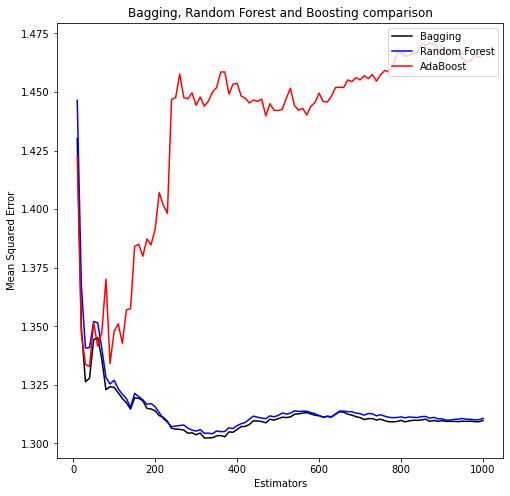

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Bagging, Random Forest and Boosting comparison')
plt.plot(estimators, bagging_mse, 'b-', color="black", label='Bagging')
plt.plot(estimators, rf_mse, 'b-', color="blue", label='Random Forest')
plt.plot(estimators, boosting_mse, 'b-', color="red", label='AdaBoost')
plt.legend(loc='upper right')
plt.xlabel('Estimators')
plt.ylabel('Mean Squared Error')
plt.show()